In [2]:
import matplotlib.pyplot as plt
import scipy.stats as sps
import numpy as np

Draw a 200 samples each from these two distributions

* A sample `s1` from a 2-D Gaussian with mean = `[1,1]` and covariance matrix cov = `[[1,0],[0,1]]`
* A sample `s2` from a 2-D 1 Gaussian with mean = `[0,0]` and covariance matrix cov = `[[1,0.8],[0.8,1.0]]`


In [144]:
s1 = np.random.multivariate_normal([1, 1], [[1,0],[0,1]], 200)
s2 = np.random.multivariate_normal([0, 0], [[1,0.8],[0.8,1]], 200)

Prepare a scatter plot of both these sets of samples on the 2-D plane, with the markers having two different colors

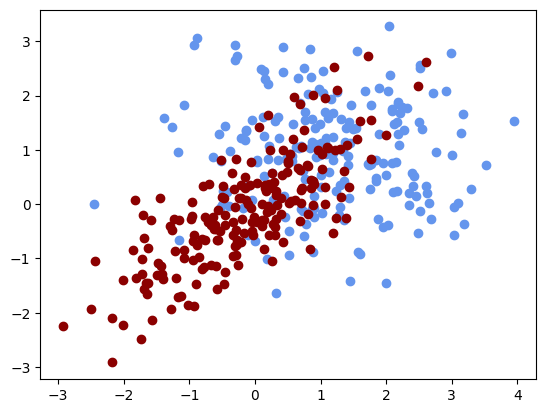

In [145]:
plt.scatter([s1[i][0] for i in range(200)], [s1[i][1] for i in range(200)], color = 'cornflowerblue')
plt.scatter([s2[i][0] for i in range(200)], [s2[i][1] for i in range(200)], color = 'darkred')

As discussed in the lecture, the simples neural network is the "Perceptron" 

$$
f(\vec{x}; \vec{w},b) = \Phi(\sum w_i x_i - b) = \Phi(\vec{w}\cdot\vec{x} - b)
$$,

where $\Phi$ is the heaviside step function.

Write a function that implements the perceptron model and is able to evaluate a input sample for $w_1 = 0.2$, $w_2 = 0.4$ and $b = 0.7$

In [34]:
def perceptron(w_list, x_list, b):
    x_dot_w = np.asarray(w_list) @ np.asarray(x_list)
    if (x_dot_w - b) >= 0:
        return 1
    else:
        return 0

def perceptron_w_b(x):
    w_list = [0.2, 0.4]
    b = 0.7
    return perceptron(w_list, x, b)

Evaluate the function on a 2-D grid with 100 x 100 points and visualize what the function value looks like in the 2-D plane

10000

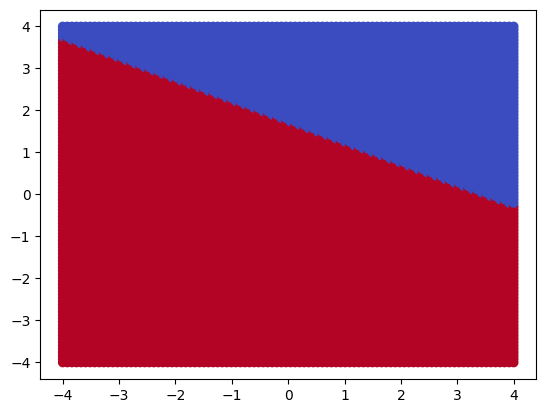

In [76]:
x_range = np.linspace(-4, 4, 100)
y_range = np.linspace(-4, 4, 100)

grid = []

for x in x_range:
    for y in y_range:
        result = perceptron_w_b([x, y])
        grid.append([x, y, result])

grid = np.array(grid)
plt.scatter(grid[:,0], grid[:,1], c =grid[:,2], cmap = 'coolwarm_r')

As above, we often will want to evaluate a function on many points at once. Therefore it's useful to write the function in a way such that we can quickly do so. 

One way to to this is via "matrix multiplication" 

$$
    r = \Phi(X w^T - b)
$$

where $X$ is a (N,2) matrix and $w^T$ is the transpose of the weight vector $\vec{w}$ (i.e. column vector or (2,1) matrix)

Write a function that can evaluate $N$ points in one go, by making use of this relationship

In [107]:
def matrix_perceptron(x_matrix):
    w_list = [0.2, 0.4]
    b = 0.7
    result = []
    for i in x_matrix:
        if np.asarray(i) @ np.asarray(w_list) >= b:
            result.append(1)
        else:
            result.append(0)

    return result

Sample 10,000 points in the 2-D input space uniformly between (-5,5) and evaluate those points using the perceptron model

Additionally re-add the scatter plot of the two Gaussian samples

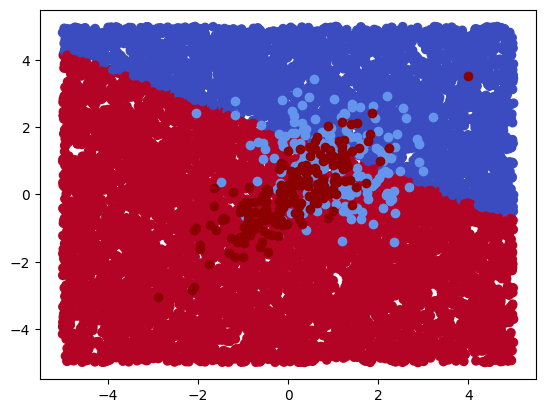

In [113]:
points = np.random.uniform(-5, 5, size=(10_000, 2))

results = matrix_perceptron(points)

plt.scatter(points[:,0], points[:,1], c=results, cmap='coolwarm_r')
plt.scatter([s1[i][0] for i in range(200)], [s1[i][1] for i in range(200)], color = 'cornflowerblue')
plt.scatter([s2[i][0] for i in range(200)], [s2[i][1] for i in range(200)], color = 'darkred')


* Evaluate both Gaussian samples with the perceptron model.
* Create a histogram for the output of the histogram of the two samples.

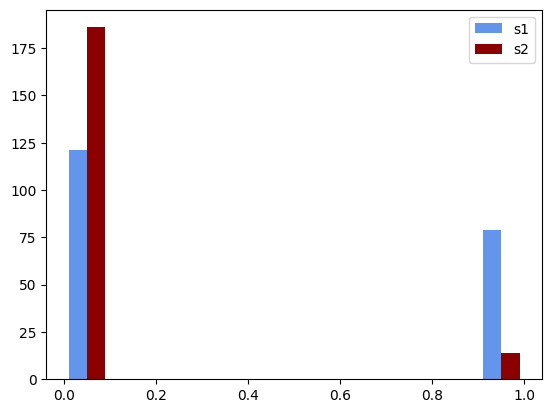

In [146]:
results = (matrix_perceptron(s1), matrix_perceptron(s2))

a = plt.hist(results, color = ('cornflowerblue', 'darkred'), label=('s1', 's2'))
plt.legend()

Out of the 200 samples in `s1`, for how many events does the perceptron return 1 or zero respectively? 

How about for the sample `s2`?

In [147]:
print(f's1: #0: {a[0][0][0]}, #1: {a[0][0][9]}')
print(f's2: #0: {a[0][1][0]}, #1: {a[0][1][9]}')

s1: #0: 121.0, #1: 79.0
s2: #0: 186.0, #1: 14.0


Let's say the samples of s1 should of of type `1` and the samples of s2 are of type `0`. What's the accuracy (as a percentage) of the perceptron model in predicting the right type?

In [151]:
(a[0][0][9] + a[0][1][0])/400

0.6625

This type we have you values for $w_1$, $w_2$, and $b$.. can you find values that are better at this prediction tasks?